## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setting Working Directory
working_directory = ('/content/drive/MyDrive/Almabetter/Telecom Churn Capstone Project/Telecom Churn.csv')

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/Almabetter/Telecom Churn Capstone Project/Telecom Churn.csv')

##***Exploring Dataset***

In [ ]:
#displaying top 5 entries of dataset to get an idea about dataset 
df.head() 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#displaying last 5 entries of the dataset
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
df.shape

(3333, 20)

***Information Given***

In [ ]:
#checking information about dataset & types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
#Checking Null Values
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

***Statastics Of Dataset***

In [ ]:
#Summary Statastics
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#how many unique states we have in our dataset
df['State'].nunique() 

51

***Unique Dataset***

In [ ]:
#how many unique area we have in our dataset
df['Area code'].nunique() 

3

***This dataset have only 3 unique Area code so we can delete this column from our dataset for cleaning purpose as this is a redundant attribute.***

In [ ]:
#deleting column from dataset
del df['Area code']

In [ ]:
#checking the resultat dataset after deletion
df.head()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#counting occurences of states in dataset 
state_subscribers_count=df['State'].value_counts() 
state_subscribers_count

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

***We have WV as a state with maximum number of subscribers and CA with minimum number of subscribers. We need to do some sort of market reinforcement to capture more number of subscribers in CA.***

In [ ]:
#how many subscribers have International Plan
df['International plan'].value_counts() 

No     3010
Yes     323
Name: International plan, dtype: int64

***Only 9.6% (~10%) of total subscribers have opted for international plan which shows that we can provide more better plans and services to draw more people into the international plan and parallely we can focus more on our local subscribers and services.***

In [ ]:
#how many subscribers have churned
df['Churn'].value_counts() 

False    2850
True      483
Name: Churn, dtype: int64

In [ ]:
df.loc[df["Churn"]== True].head()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True


***We have lost approximately 15% (14.5%) of our subscribers as per the given data set. We have to study those people who stopped using services of company. Also we neeed to do some sort of customer reactivation to overcome this loss.***

In [ ]:
#which subscriber have made maximum number of customer service calls
max_index = df['Customer service calls'].idxmax()
max_row = df.loc[[max_index]]
max_row

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
542,MN,152,Yes,Yes,20,237.5,120,40.38,253.4,94,21.54,265.2,80,11.93,14.2,3,3.83,9,True


***We can observe details closely for this specific customer what lead him/her to make maximum number of Customer service calls by inspecting services and network quality in that specific area.***

In [ ]:
#details of max calls
max_day_calls = df.groupby(by=["State"]).sum()
max_day_calls
max_day_calls.head()

<ipython-input-20-818a50716ab7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  max_day_calls = df.groupby(by=["State"]).sum()


,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
State,,,,,,,,,,,,,,,,
AK,5054,471,9276.0,4954,1576.94,9582.7,5022,814.54,10001.0,5062,450.05,521.0,250,140.68,81,3
AL,7842,574,14880.8,7928,2529.72,15637.0,7877,1329.16,14982.8,7889,674.23,823.4,376,222.32,125,8
AR,5334,396,9686.4,5618,1646.70,11057.6,5381,939.93,11300.0,5448,508.52,570.5,258,154.04,109,11
AZ,6430,606,10982.7,6407,1867.08,12015.9,6554,1021.37,12416.3,6399,558.76,680.4,311,183.72,102,4
CA,3374,306,6241.2,3553,1061.01,6765.0,3505,575.06,6749.3,3373,303.72,335.5,151,90.63,50,9


***From below 2 observations we get to know that WA is state have maximum number of day,eve and opposite to that we have CA***

In [ ]:
#Adding new feature in dataset (by summing up calling) 
total_localcalls= df["Total day calls"] + df["Total night calls"] + df["Total eve calls"]  
df["Total Local Calls"] = total_localcalls

In [ ]:
#which state makes max day calls

column = max_day_calls["Total day calls"]
max_value_day = column.max()
print(max_value_day)


df_01=max_day_calls.copy()
df_01= df_01.rename(columns={'Total day calls': 'TDC', 'Total eve calls': 'TEC', 'Total night calls': 'TNC', 'Total Local Calls': 'TLC'}) 

#finding state
state_highest_day_calls=df_01[df_01.TDC == 11001]
state_highest_day_calls

11001


,Account length,Number vmail messages,Total day minutes,TDC,Total day charge,Total eve minutes,TEC,Total eve charge,Total night minutes,TNC,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
State,,,,,,,,,,,,,,,,
WV,10116,925,18438.8,11001,3134.67,19971.8,10394,1697.56,21311.9,10660,959.06,1067.2,468,288.19,159,10


In [ ]:
#which state makes min eve calls

column1 = max_day_calls["Total eve calls"]
min_value_eve = column1.min()
print(min_value_eve)


#finding state
state_min_eve_calls=df_01[df_01.TEC == 3505]
state_min_eve_calls

3505


,Account length,Number vmail messages,Total day minutes,TDC,Total day charge,Total eve minutes,TEC,Total eve charge,Total night minutes,TNC,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
State,,,,,,,,,,,,,,,,
CA,3374,306,6241.2,3553,1061.01,6765.0,3505,575.06,6749.3,3373,303.72,335.5,151,90.63,50,9


***From this we observe that subscriber making minimum number of total local calls is calling customer service care 2 times more than average but still using company services. This shows that he/she is a loyal subscriber what we can do is we can target those subscribers by providing personalised offers.***

In [ ]:
#Summing up charges to see how billing cycle affects them and their churning decision
total_charge_col = df["Total day charge"] + df["Total night charge"] + df["Total eve charge"] + df["Total intl charge"]
df["Total Charges"] = total_charge_col

In [ ]:
#checking updated dataset
df.head()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total Local Calls,Total Charges
0,KS,128,No,Yes,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,False,300,75.56
1,OH,107,No,Yes,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,False,329,59.24
2,NJ,137,No,No,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,False,328,62.29
3,OH,84,Yes,No,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,False,248,66.80
4,OK,75,Yes,No,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,False,356,52.09


In [ ]:
#which subscriber has maximum total charges
df.iloc[df['Total Charges'].argmax()] 

State                        NY
Account length               64
International plan          Yes
Voice mail plan              No
Number vmail messages         0
Total day minutes         346.8
Total day calls              55
Total day charge          58.96
Total eve minutes         249.5
Total eve calls              79
Total eve charge          21.21
Total night minutes       275.4
Total night calls           102
Total night charge        12.39
Total intl minutes         13.3
Total intl calls              9
Total intl charge          3.59
Customer service calls        1
Churn                      True
Total Local Calls           236
Total Charges             96.15
Name: 985, dtype: object

In [ ]:
#subscriber with minimum charges
df.iloc[df['Total Charges'].argmin()]

State                        SD
Account length               98
International plan           No
Voice mail plan              No
Number vmail messages         0
Total day minutes           0.0
Total day calls               0
Total day charge            0.0
Total eve minutes         159.6
Total eve calls             130
Total eve charge          13.57
Total night minutes       167.1
Total night calls            88
Total night charge         7.52
Total intl minutes          6.8
Total intl calls              1
Total intl charge          1.84
Customer service calls        4
Churn                      True
Total Local Calls           218
Total Charges             22.93
Name: 1345, dtype: object

***From above two observations its clear that billing and customer service calls are clearly leading to churning of subscriber.***

In [ ]:
#cheking churning frequency with respect to state
df[df['State']=='MN']['Churn'].value_counts() # 15 customer left from this state

False    69
True     15
Name: Churn, dtype: int64

In [ ]:
#for state CA
df[df['State']=='CA']['Churn'].value_counts() #out of 34 customer 9 left

False    25
True      9
Name: Churn, dtype: int64

***From above we can conclude that the state in which Orange telecom is having least number of subscribers is performing worst as 25% subscribers churned. We must setup a good infrastructure for services and customer acquisition as 1 out of every 4 customer is leaving Orange telecom in CA***

In [ ]:
#let's see trend in the famous NY city
df[df['State']=='NY']['Churn'].value_counts() #18% subscribers leaving in NY

False    68
True     15
Name: Churn, dtype: int64

***This is also a matter of concern as one of the top three cities in which Orange telecom provide services is also loosing subscribers by 18%***

In [ ]:
#observing trend between customer service calls and churning
#subscribers calling Customer service calls twice more than average

rewardsdf = df[df['Customer service calls'] > 3]   # making rewards dataframe for those facing more issues
len(rewardsdf) # lenght of dataframe

267

## ***Heatmap of the Dataset***

**'Total day minutes' and 'total charges' are highly correlated.,'Total charges' and 'Churn' are highly correlated and by transitivity 'Total day minutes' and 'Churn' are also highly correlated**

<ipython-input-39-9e64a62e6568>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-39-9e64a62e6568>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),


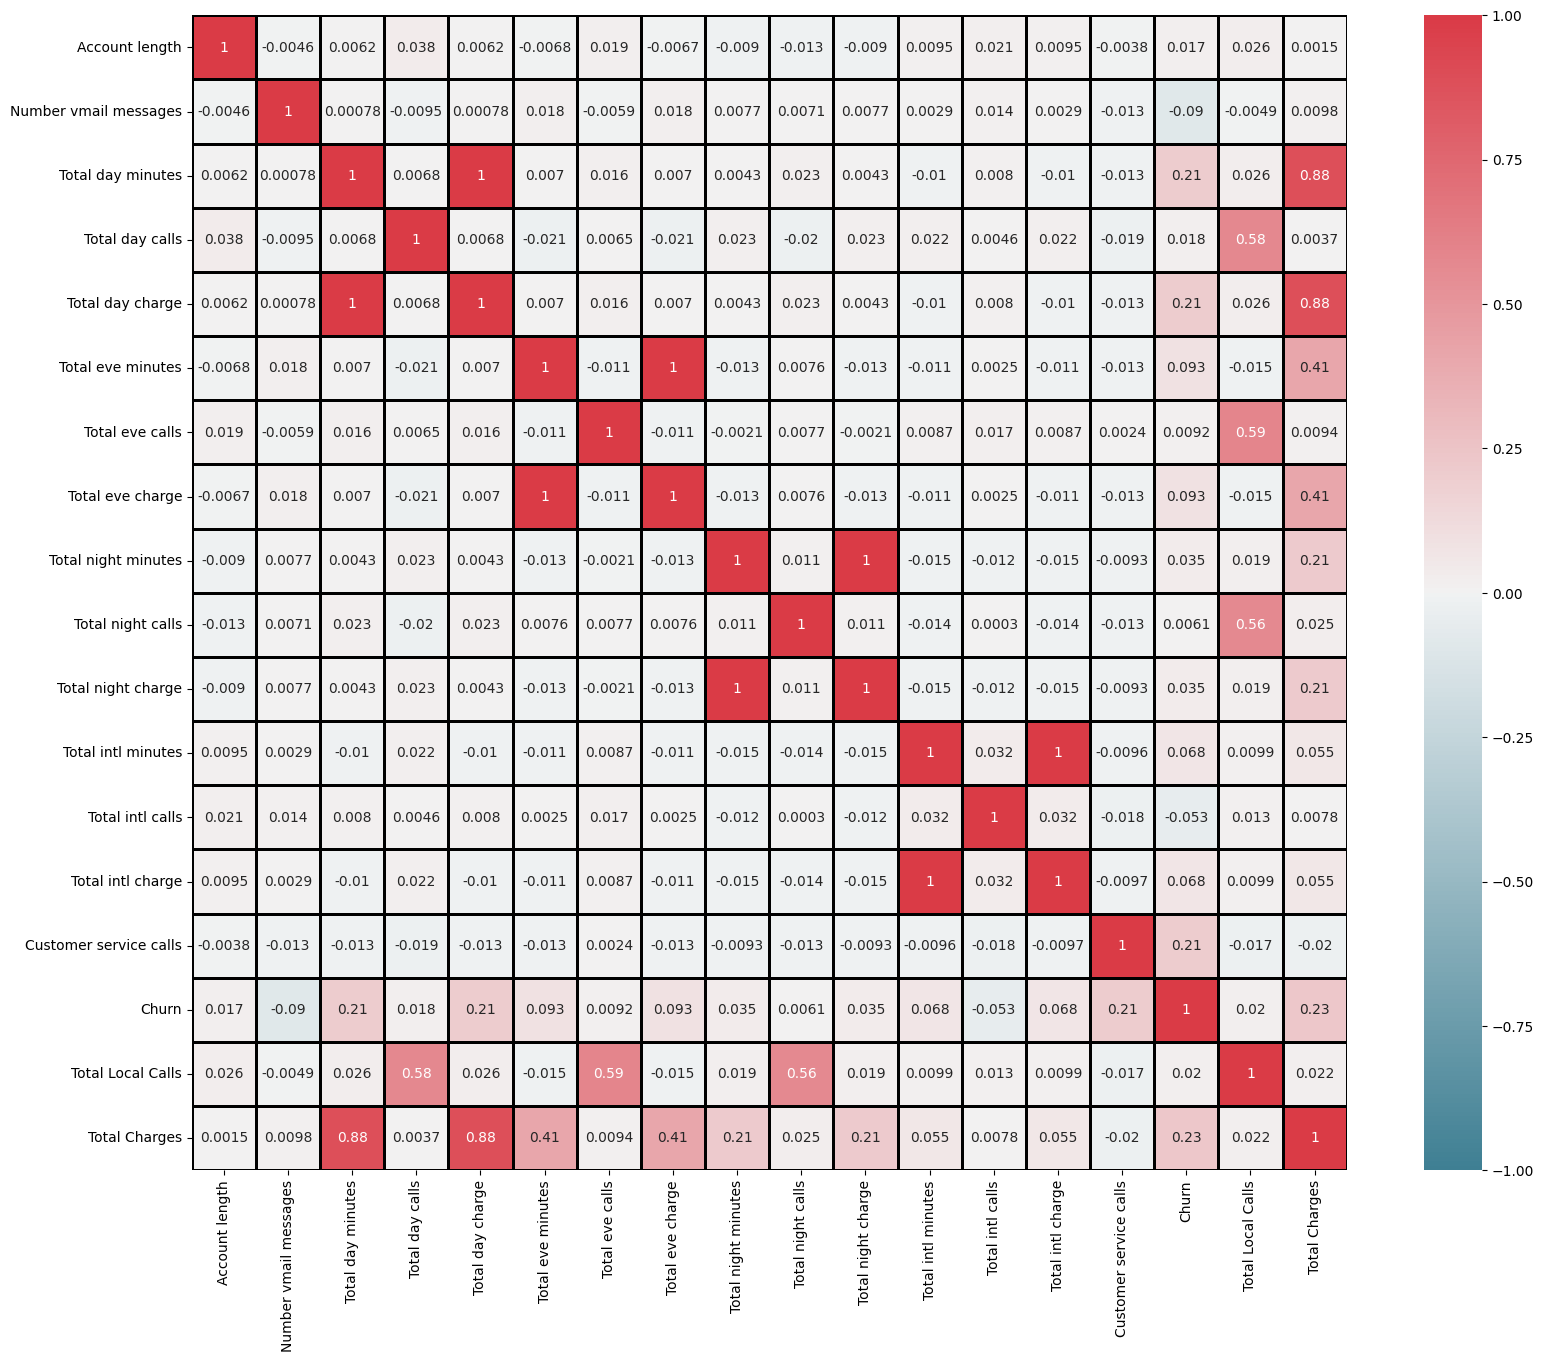

In [ ]:
# how all feautures are related to each other

f, ax = plt.subplots(figsize=(20,15))

corr = df.corr()

sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()

***Since International Plan is a string value its not present in our heatmap let's make a crosstab to get more clear picture.***

In [ ]:
#creating a cross tab for quick glance
factor =pd.crosstab(df['Churn'], df["International plan"],margins=True)
factor

International plan,No,Yes,All
Churn,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


***This clearly shows that subscribers having international plan are churning more. This gives us room and indication to figure out how to improve this plan experience for subcribers for longer retention.***

In [ ]:
#All continous variables in cont_col
cont_col = df.columns[(df.dtypes=="float64")|(df.dtypes=="int64")].tolist()
print(cont_col)

#All categorical var in cat_col
cat_col = df.select_dtypes(exclude=np.number).columns.tolist()
print(cat_col)

['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Total Local Calls', 'Total Charges']
['State', 'International plan', 'Voice mail plan', 'Churn']


# *Visualizing Dataset*

***Our target variable has two categories which include True and False values. True = Customer will move or churn out, False = Customer won’t move. The occurrence of false is higher than True. There are 2850 (85.51% ) customers who churn out and 483 (14.49%) customers retained.***

Text(0.5, 1.0, 'Distribution of Customer Churning ')

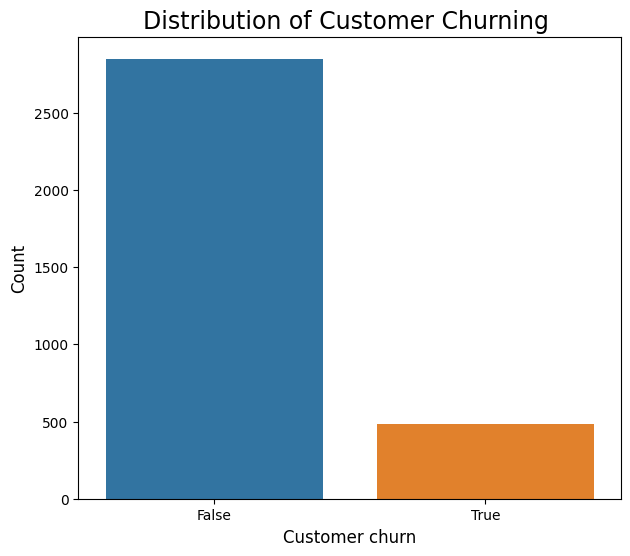

In [ ]:
#plotting graph for churn distribution
plt.figure(figsize=(7,6))
sns.countplot(x='Churn',data=df)
plt.xlabel('Customer churn', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title("Distribution of Customer Churning ",fontsize= 17)

# ***Let's check day and night calling and charge trend in the dataset***


Text(0.5, 1.0, 'Histogram Of Total Day Charge vs Total Night Charge')

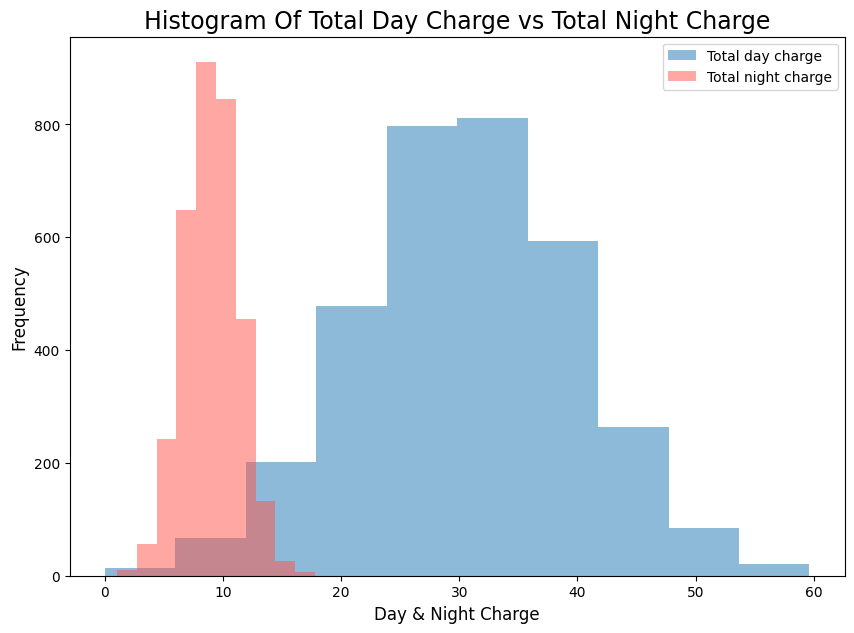

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(df['Total day charge'], 
         label='Total day charge',
         alpha=0.5)
  
plt.hist(df['Total night charge'], 
         label='Total night charge',
         alpha=0.5,
         color='#ff5349')

plt.legend()
plt.xlabel('Day & Night Charge',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Histogram Of Total Day Charge vs Total Night Charge',fontsize=17)

***As we can see that in the graph above describes that Total Day Charge is quite High as compared to Night Charge***

Text(0.5, 1.0, 'Histogram Of Total Day Calls vs Total Night Calls')

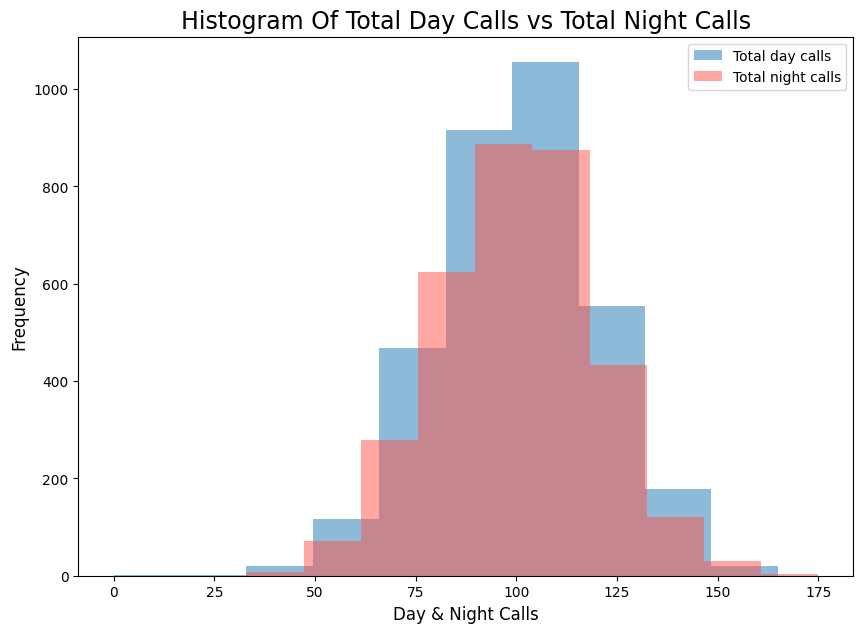

In [ ]:
#day and night calls
plt.rcParams["figure.figsize"] = (10,7)
plt.hist(df['Total day calls'], 
         label='Total day calls',
         alpha=0.5)
  
plt.hist(df['Total night calls'], 
         label='Total night calls',
         alpha=0.5,
         color='#ff5349')

plt.legend()
plt.xlabel('Day & Night Calls',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Histogram Of Total Day Calls vs Total Night Calls',fontsize=17)

# ***Churn and other attributes comparision***

In [ ]:
#defining function for comparision
def bar_compare(x,y):
    df.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 38)
    plt.show()

***State & Churn Analysis***

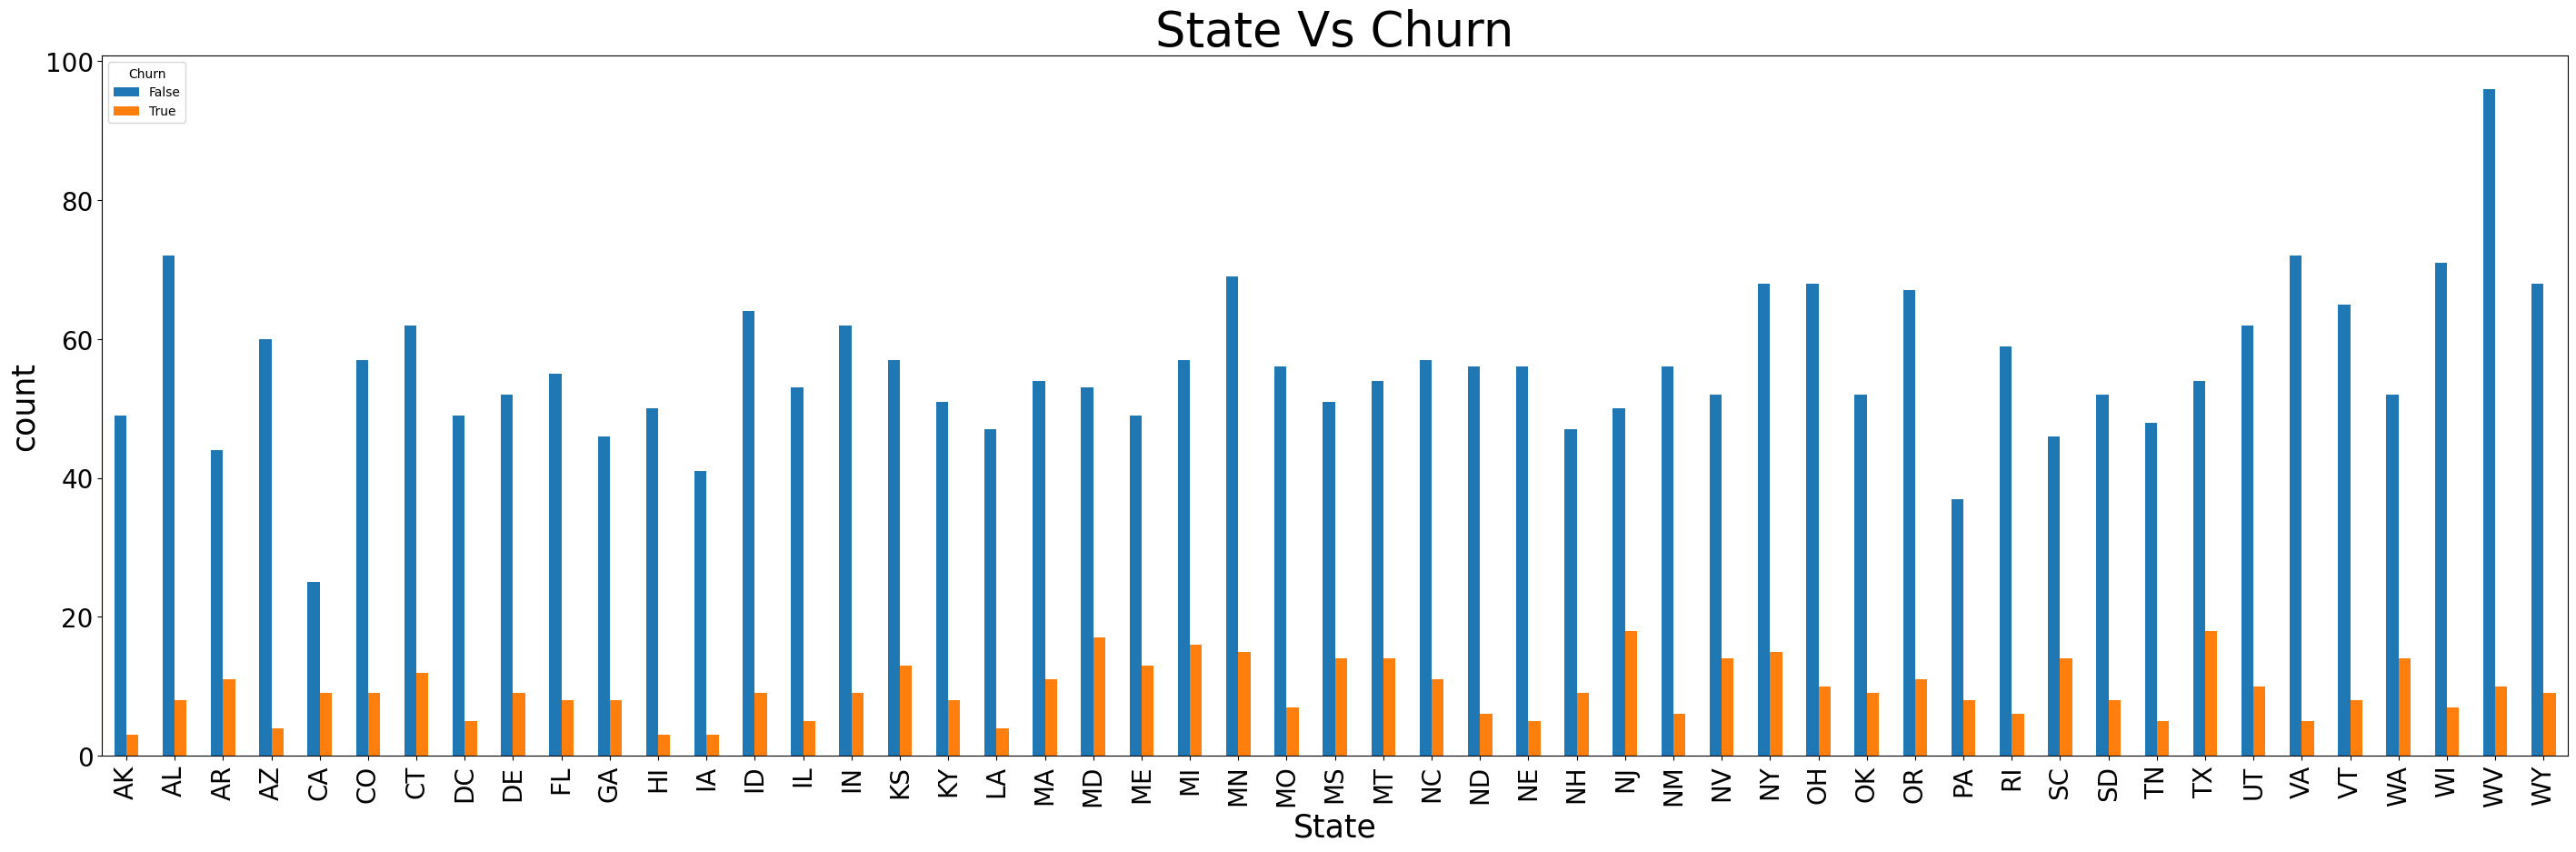

In [ ]:
#State Wise Churning of customer
bar_compare('State','Churn')

***Churn and International Plan analysis***

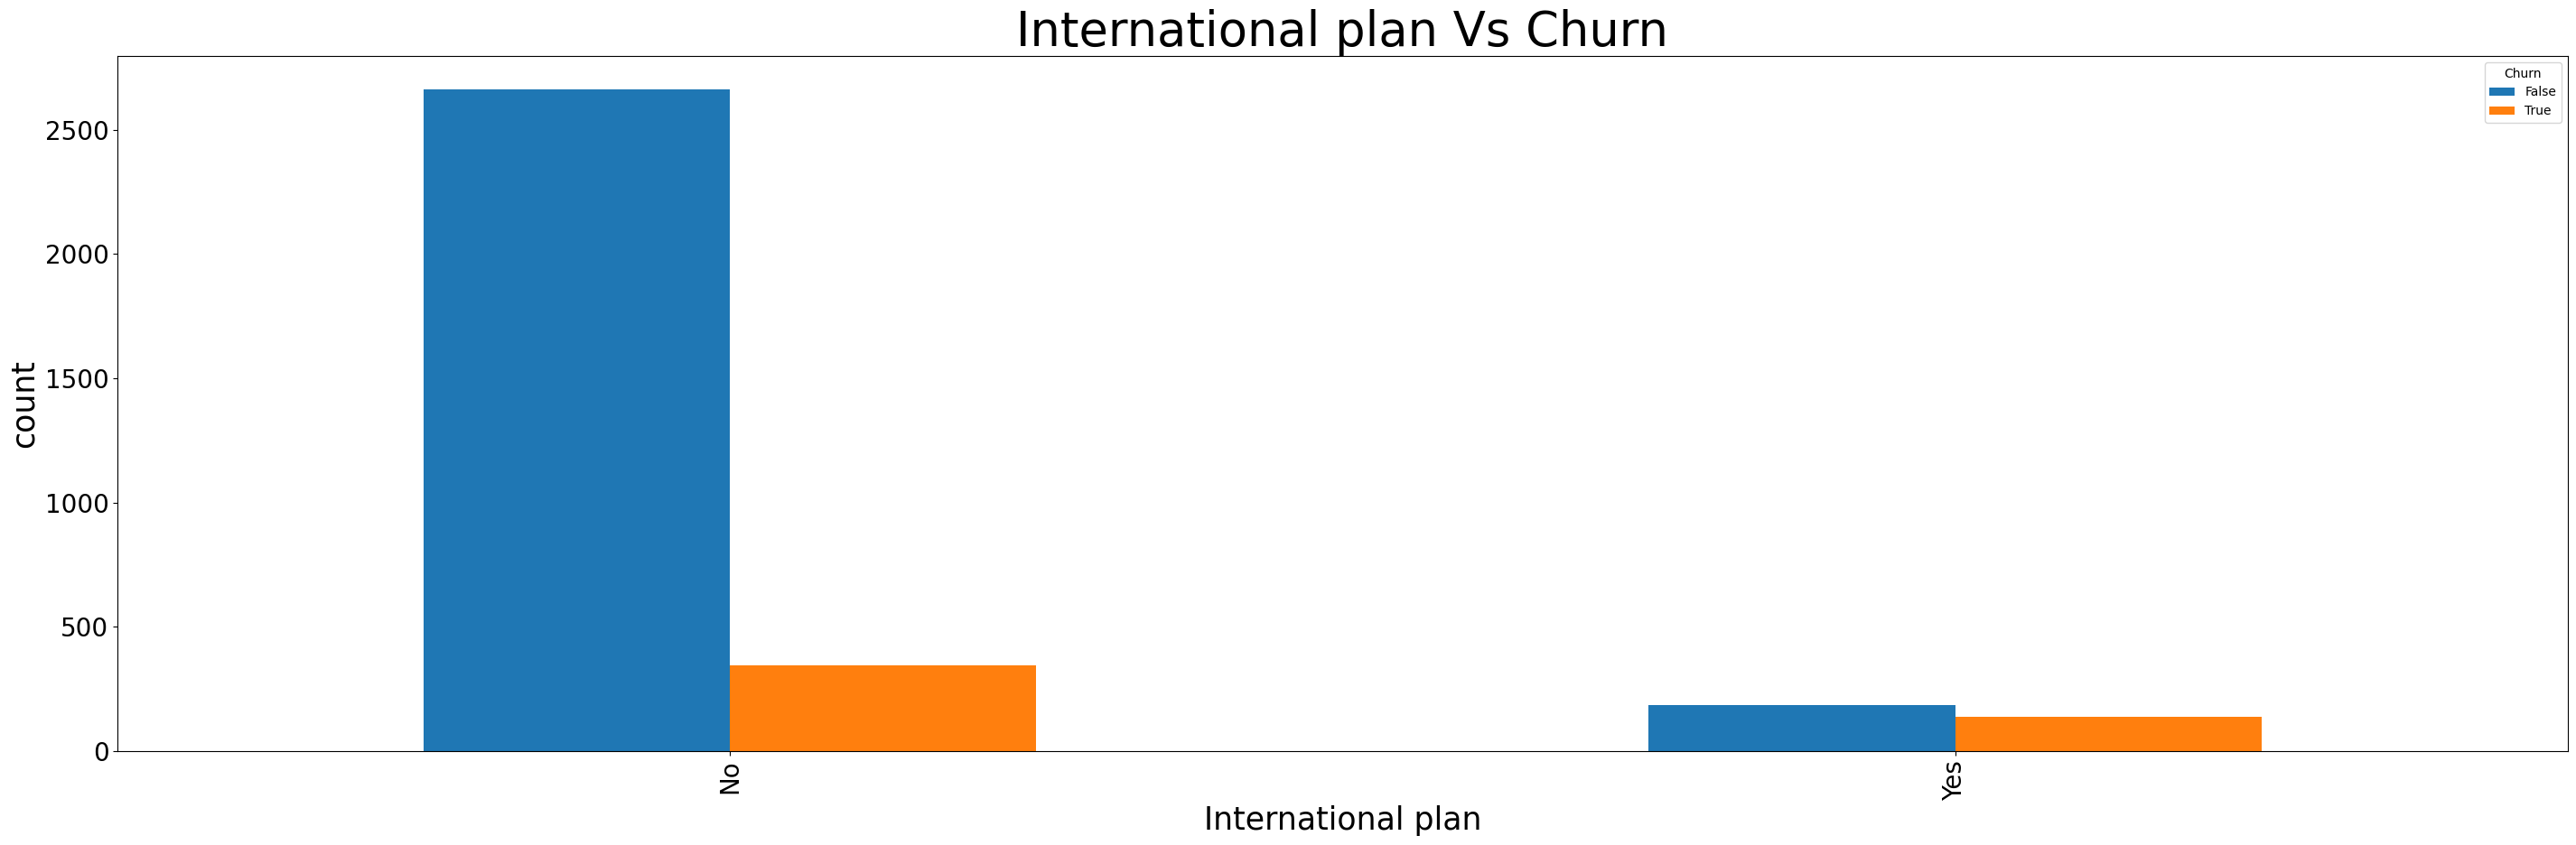

In [ ]:
#International_Plan Wise Churning of customer
bar_compare('International plan','Churn')

***Above graph shows that Churn rate is more with customers using international plan. As only 323 customer using International plan and 137 churning out of them.***

***Churn according to Voicemail Plan***

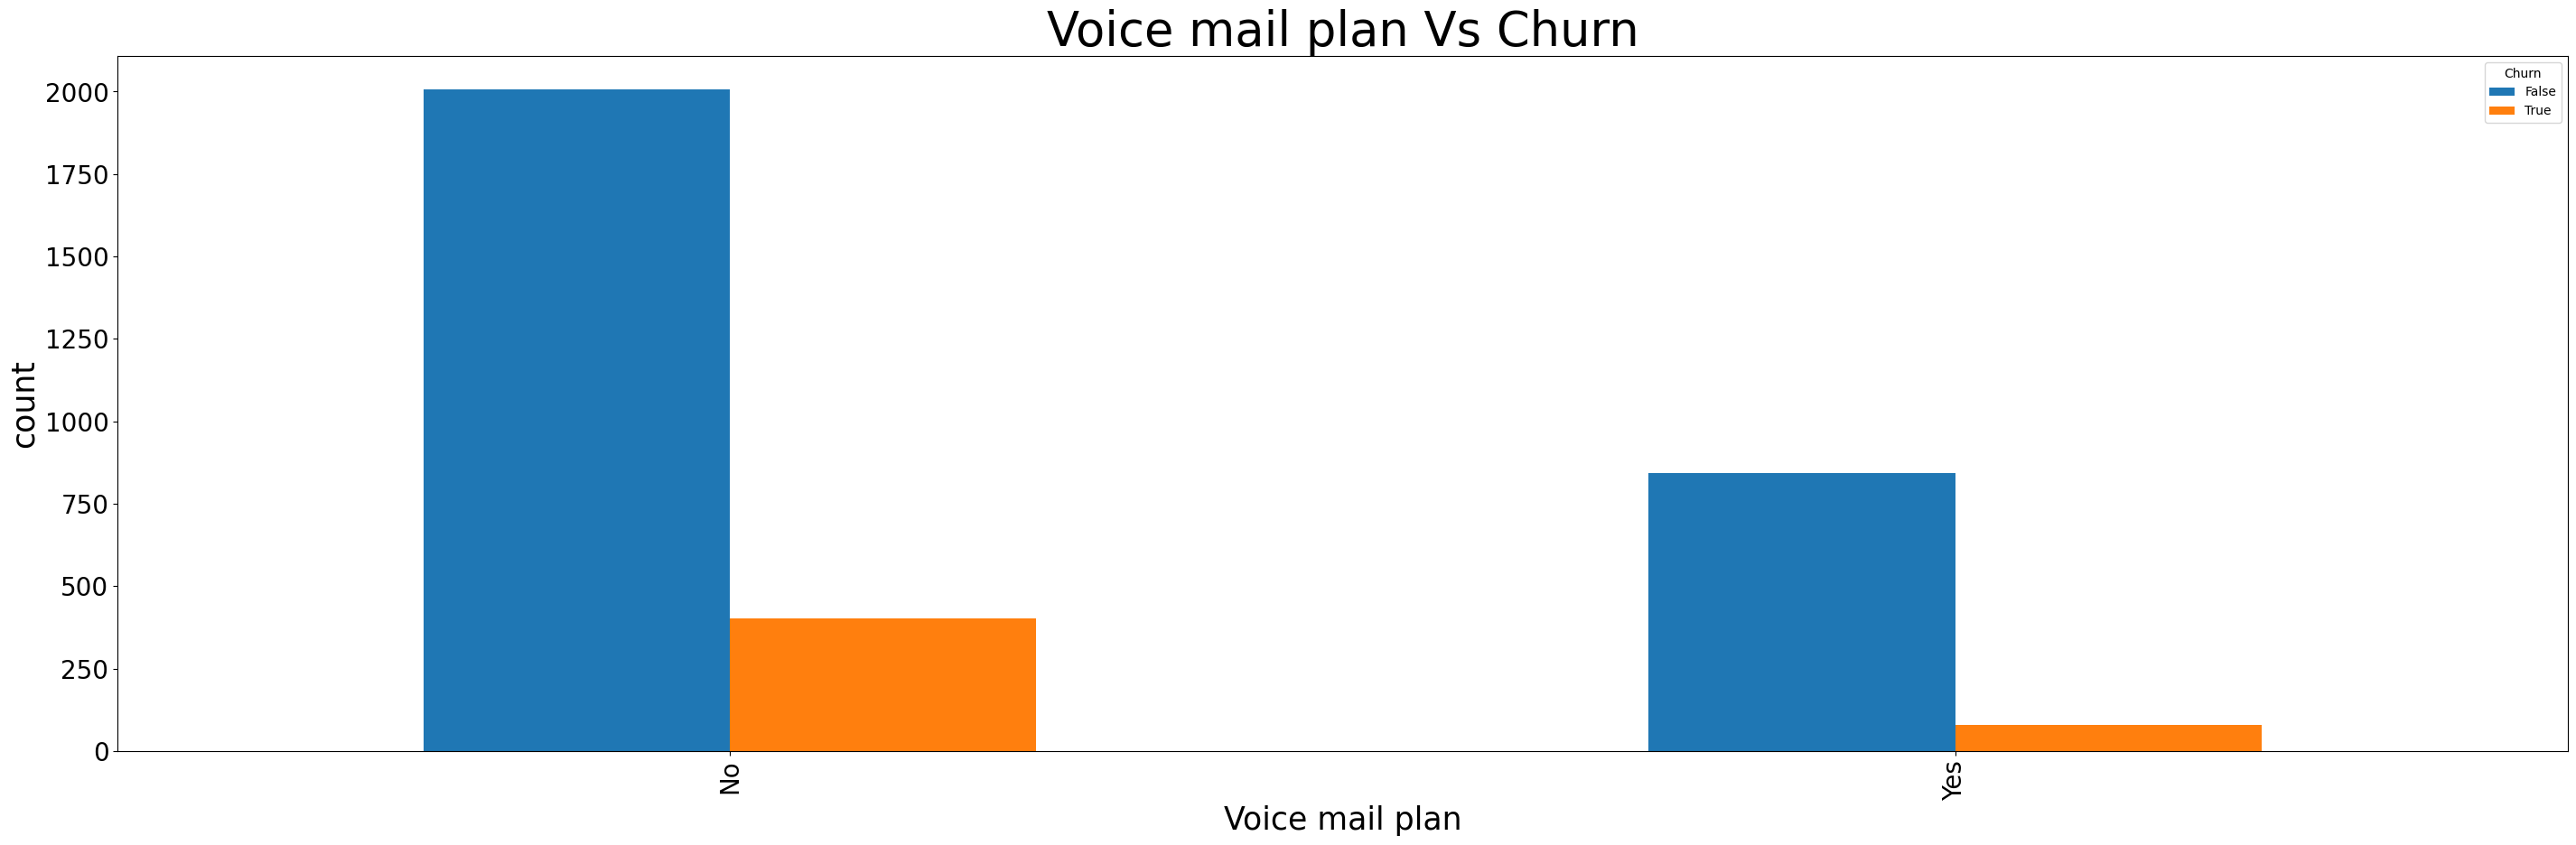

In [ ]:
#No. of Customer Churning and had a Voice mail plan
bar_compare('Voice mail plan','Churn')

# ***Let's see how Orange telecom is performing in various states***

Text(0, 0.5, 'Subscribers')

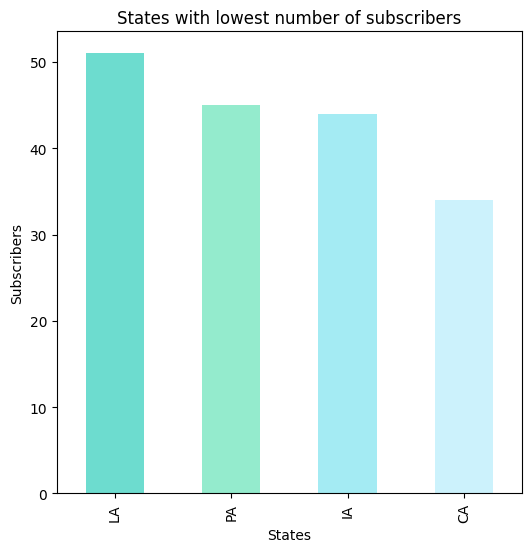

In [ ]:
#selectig low performing states
states_to_improve=df['State'].value_counts().tail(4)   #gives series of last 4 states with count

 #plotting bar graph
plot = states_to_improve.plot.bar(figsize=(6, 6),color=['#6DDCCF','#94EBCD','#A4EBF3','#CCF2FC'])     
plt.title('States with lowest number of subscribers')   #setting title 
#setting x and y label
plt.xlabel('States')     
plt.ylabel('Subscribers')

***We need to work more exclusively for these 4 states. Apart from this as we can see that our low performing states are having somewhat equal performance but state CA need more attention in terms of more subscriber acquisition and market reach.***

Text(0, 0.5, 'States')

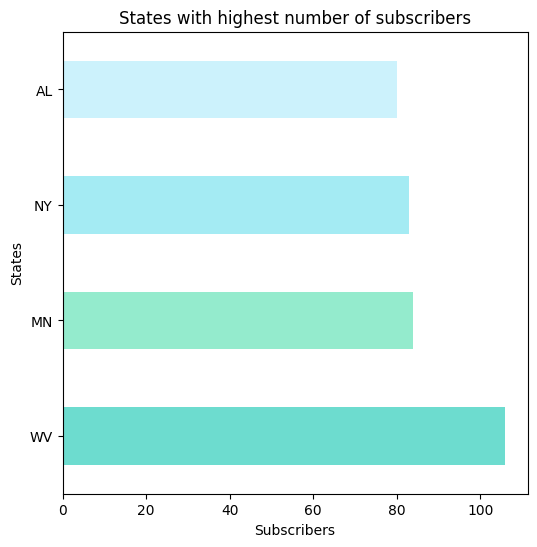

In [ ]:
#selectig high performing states
states_with_most_subscribers=df['State'].value_counts().head(4)   #gives series of first 4 states with count

 #plotting bar graph
plot = states_with_most_subscribers.plot.barh(figsize=(6, 6),color=['#6DDCCF','#94EBCD','#A4EBF3','#CCF2FC'])     

plt.title('States with highest number of subscribers')   #setting title 
#setting x and y label
plt.xlabel('Subscribers')     
plt.ylabel('States')

##***Distribution Of Variables***

***As we can clearly see that Most of thevariables are normally distributed.***

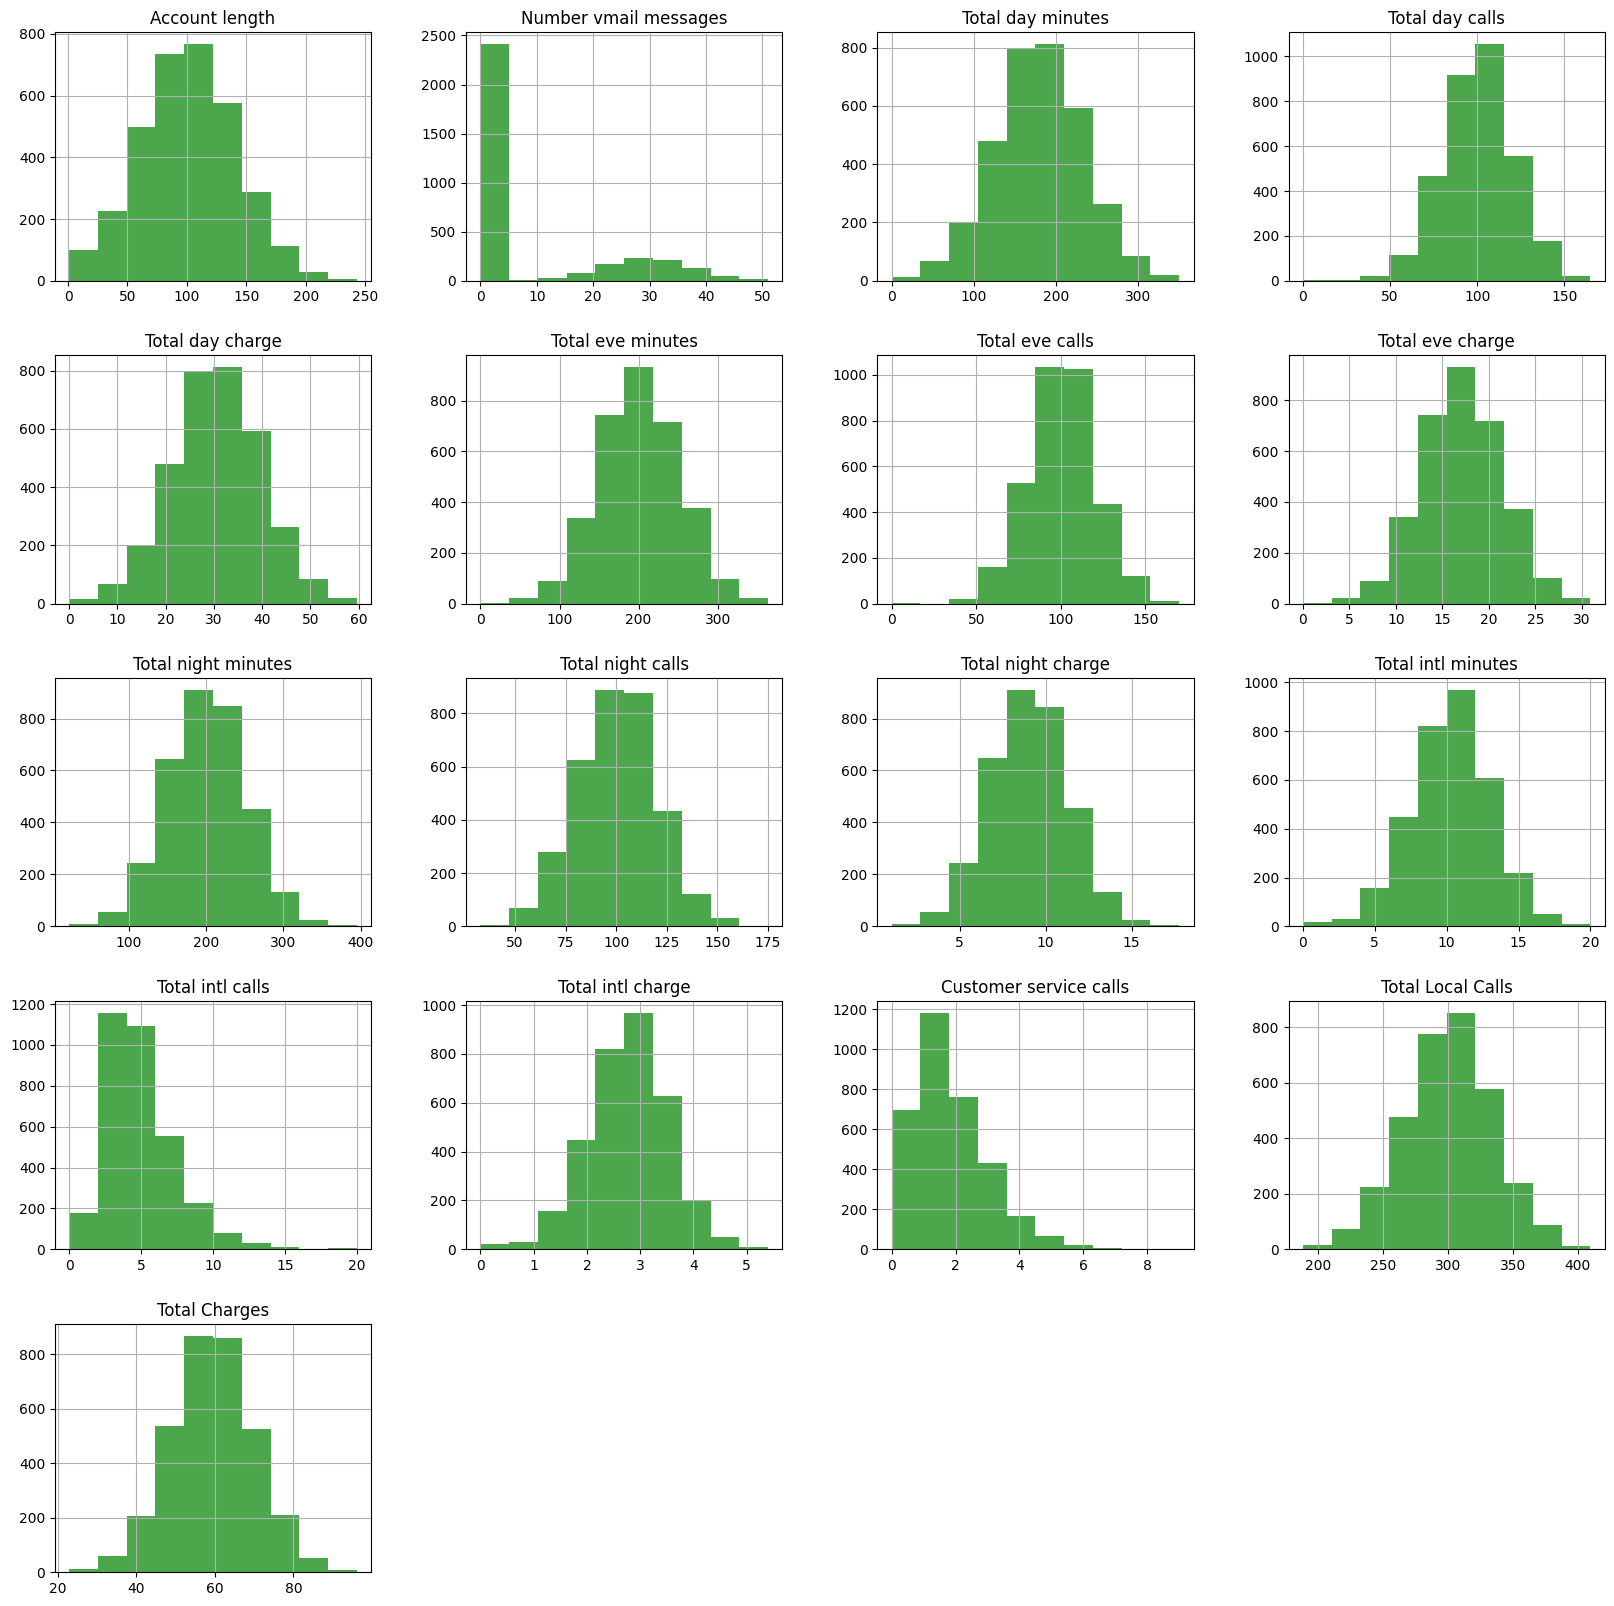

In [ ]:
#Checking distribution of data via pandas visualization

df[cont_col].hist(figsize=(20,20),color='g',alpha = 0.7)
plt.show()

***Histogram breaks down by Target (Churn) Variable***

In [ ]:
#Histogram breaks down by Churn Feature
def plot_hist_y(x,y):
    plt.hist(list(x[y == 1]),color='green',label='True',bins='auto')
    plt.hist(list(x[y == 0]),color='grey', alpha = 0.7, label='False',bins='auto')
    plt.title("Histogram of {var} breakdown by {Y}".format(var = x.name,Y=y.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.savefig("Histogram of {var} breakdown by {Y}.png".format(var = x.name,Y=y.name))
    plt.show()

#***Insights:-***

1.The area code field is anomalous and can be omitted.

2.Customers with Voicemail plans tend to churn less frequently.

3.Customers with International plan tend to churn more frequently.

4.Orange's International plan needs improvement in respective aspects associated to it.

5.Customers more evening charges tend to churn at a higher rate in comparision to other customers.

6.More (>4) customer service calls clearly leads to more churning.

7.In CA Orange telecom have lowest number of subscribers but still have very high churning rate.

#***Recommendations:-***

1.Fixing all issues mentioned above will make the business thrive.

2.Company need to focus on Top 5 States having highest Churning Rate and can give discounts and coupans to decrease the rate.

3.Company can give benifits to Top 5 States having lowest churning rate in terms of various offers as these States are loyal and revenue generator for the Company.

4.As most of the customer who are getting churned are those whose "total day min" is very high, so we can provide a high talk time offer with offers to these customers.

5.Improve customer service assistance services.

6.Orange telecom need more infrastructure in terms of marketing,technology and services especially in CA and also in NY to reduce churning rate.

7.Orange telecom can introduce exclusive offers,services for international plans to turn local prospects into international subscribers.

8.The company can reduce daytime calling charges.

9.Extra services like voicemail plan, international plan are required to be revamp.